## 離散フーリエ変換と高速フーリエ変換

$$
FFT:\ \ y[k]=\sum_{k=0}^{N-1}e^{-2\pi j\frac{kn}{N}}x[n]\\
IFFT:\ \ x[n]=\frac{1}{N}\sum_{k=0}^{N-1}e^{2\pi j\frac{kn}{N}}y[k]
$$
連続周期的なデータを何かしら離散的なものに分解しようとしている。

In [9]:
from scipy.fftpack import fft, ifft
import numpy as np
import matplotlib.pyplot as plt

In [69]:
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x) # xを高速フーリエ変換
for i in range(len(y)):
    print('y[{0}]={1}'.format(i, y[i]))

y[0]=(4.5+0j)
y[1]=(2.081559480312316-1.651098762732523j)
y[2]=(-1.831559480312316+1.6082204064440706j)
y[3]=(-1.831559480312316-1.6082204064440706j)
y[4]=(2.081559480312316+1.651098762732523j)


In [5]:
yinv = ifft(y) # 逆変換すると元に戻る
yinv

array([ 1. +0.j,  2. +0.j,  1. +0.j, -1. +0.j,  1.5+0.j])

In [7]:
np.sum(x)

4.5

yの値に注目すると、
$y[0]=\sum x[n]$であり、
$y[1]=\bar{y[4]},\ y[2]=\bar{y[3]}$である。  
$n$を増やしてみる。

In [93]:
x = np.array([1.0,2.0,1.0,-1.0,1.5,1.0])
y = fft(x)
for i in range(len(y)):
    print('y[{0}]={1}'.format(i, y[i]))

y[0]=(5.5+0j)
y[1]=(2.25-0.4330127018922191j)
y[2]=(-2.75-1.2990381056766576j)
y[3]=(1.5+0j)
y[4]=(-2.75+1.2990381056766576j)
y[5]=(2.25+0.4330127018922191j)


同じく$y[0]=\sum x[n]$であり、$y[1]=\overline{y[5]},\ y[2]=\overline{y[4]}$である。  
このことから、次の事が予想される。  
- $y[0]=\sum x[n]$
- $n$が偶数のとき、$y[1]=\overline{y[n-1]},\ y[2]=\overline{y[n-2]}, \cdots, y[n/2-1]=\overline{y[n/2+1]}$で、$y[n/2]$はなんらかの実数
- $n$が奇数のとき、$y[1]=\overline{y[n-1]},\ y[2]=\overline{y[n-2]}, \cdots, y[(n-1)/2]=\overline{y[(n-1)/2]}$

In [121]:
# sinカーブで上記の条件が成り立っているか確認する。
x = np.linspace(0.0,2.0,41)
y = np.sin(np.pi*x)
f_y = fft(y)
for i in range(len(f_y)):
    print('y[{0}]={1}'.format(i, f_y[i]))

y[0]=(-7.216449660063518e-16+0j)
y[1]=(1.5482162660696588-20.165755177671446j)
y[2]=(-0.10629915750170366+0.6882009107402574j)
y[3]=(-0.08873902707379427+0.3792119989596096j)
y[4]=(-0.0838898863458621+0.26508072483095624j)
y[5]=(-0.08182166285140594+0.20301318095031895j)
y[6]=(-0.08074168208410308+0.16307117311389963j)
y[7]=(-0.08010555284711582+0.13474321262147404j)
y[8]=(-0.07969949545211676+0.11330860943013547j)
y[9]=(-0.07942504296823671+0.09630850943049113j)
y[10]=(-0.07923155580390577+0.08232675391775889j)
y[11]=(-0.0790907889337372+0.0704854429673011j)
y[12]=(-0.07898597771815777+0.06020839433166368j)
y[13]=(-0.07890667523757264+0.051099445845994435j)
y[14]=(-0.0788461175629704+0.042875159604798346j)
y[15]=(-0.07879979498034509+0.035325366562881655j)
y[16]=(-0.07876463829082397+0.02828885798791972j)
y[17]=(-0.07873853704482402+0.021637729005171608j)
y[18]=(-0.07872004609385935+0.015266853284233411j)
y[19]=(-0.0787082042227574+0.009086478235018208j)
y[20]=(-0.078702423056367+0.00

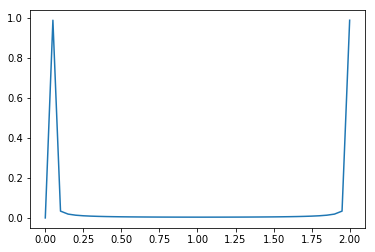

In [122]:
plt.plot(x,2/41*np.abs(f_y)) # symmetricなグラフになる
#plt.plot(x,np.abs(y.imag))

2つの$\sin$関数から成る関数を作成して高速フーリエ変換する。
$$
f(\theta)=\sin(50\times 2\pi \theta)+0.5\sin (80\times 2\pi \theta)
$$
これは周波数$50Hz$と$80Hz$の複合波になる。

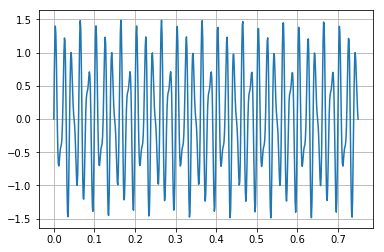

In [129]:
N = 600
T = 1.0 / 800.0 # 周期?
x = np.linspace(0.0, N*T, N) # 区間[0,N*T]
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

plt.plot(x,y) # 周期的な波形になる
plt.grid()
plt.show()

In [131]:
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2) 

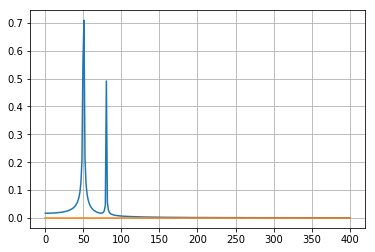

In [132]:
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]).imag)
plt.grid()
plt.show()

上のグラフで、周期的波形が二つ周波数($50Hz,\ 80Hz$)の波形の合成である事がわかる。  
  
この$f(\theta)$は本来無限に続くので、解析では一部を切り取って（窓関数を重ねる）いるらしい。この例では方形窓関数が用いられ、sinc関数のような形になるが、この過程で本来のスペクトルが減衰してしまう。このスペクトル減衰を軽減するためには他の窓関数を用いるといいらしい。

In [21]:
from scipy.signal import blackman

/Users/takayan/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


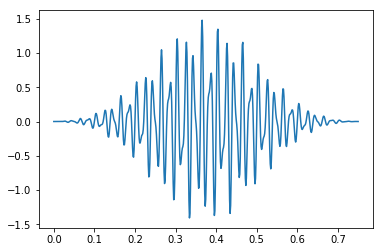

In [102]:
# ブラックマン窓関数での処理
w = blackman(N)
plt.plot(x,y*w)

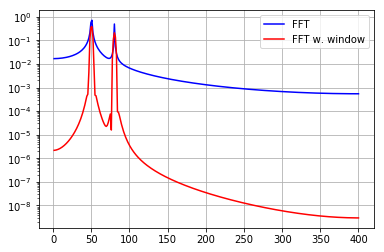

In [24]:
ywf = fft(y*w)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-b')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), '-r')
plt.legend(['FFT', 'FFT w. window'])
plt.grid()
plt.show()

In [25]:
from scipy.fftpack import fftfreq
freq = fftfreq(8, 0.125)
freq

array([ 0.,  1.,  2.,  3., -4., -3., -2., -1.])

In [142]:
from scipy.fftpack import fftshift
x = np.arange(8)
fftshift(x)

array([4, 5, 6, 7, 0, 1, 2, 3])

/Users/takayan/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


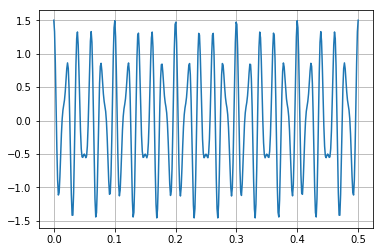

In [28]:
from scipy.fftpack import fft, fftfreq, fftshift
# number of signal points
N = 400
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.exp(50.0 * 1.j * 2.0*np.pi*x) + 0.5*np.exp(-80.0 * 1.j * 2.0*np.pi*x)
plt.plot(x,y)
plt.grid()
plt.show()

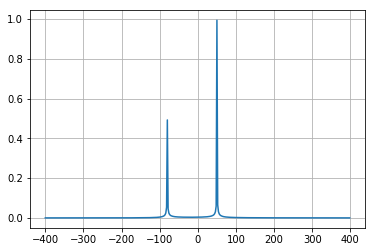

In [27]:
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.grid()
plt.show()

In [29]:
from scipy.fftpack import fft, rfft, irfft
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5, 1.0])
fft(x)

array([ 5.5 +0.        j,  2.25-0.4330127 j, -2.75-1.29903811j,
        1.5 +0.        j, -2.75+1.29903811j,  2.25+0.4330127 j])

In [30]:
yr = rfft(x)
yr

array([ 5.5       ,  2.25      , -0.4330127 , -2.75      , -1.29903811,
        1.5       ])

In [31]:
irfft(yr)

array([ 1. ,  2. ,  1. , -1. ,  1.5,  1. ])

In [32]:
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
fft(x)

array([ 4.5       +0.        j,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j, -1.83155948-1.60822041j,
        2.08155948+1.65109876j])

In [33]:
yr = rfft(x)
yr

array([ 4.5       ,  2.08155948, -1.65109876, -1.83155948,  1.60822041])

多次元の離散フーリエ変換

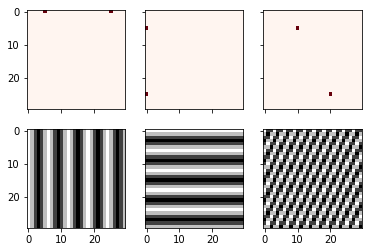

In [144]:
from scipy.fftpack import ifftn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
N = 30
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')
xf = np.zeros((N,N))
xf[0, 5] = 1
xf[0, N-5] = 1
Z = ifftn(xf)
ax1.imshow(xf, cmap=cm.Reds)
ax4.imshow(np.real(Z), cmap=cm.gray)
xf = np.zeros((N, N))
xf[5, 0] = 1
xf[N-5, 0] = 1
Z = ifftn(xf)
ax2.imshow(xf, cmap=cm.Reds)
ax5.imshow(np.real(Z), cmap=cm.gray)
xf = np.zeros((N, N))
xf[5, 10] = 1
xf[N-5, N-10] = 1
Z = ifftn(xf)
ax3.imshow(xf, cmap=cm.Reds)
ax6.imshow(np.real(Z), cmap=cm.gray)
plt.show()

離散コサイン変換

In [35]:
from scipy.fftpack import dct, idct
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
dct(dct(x, type=2, norm='ortho'), type=3, norm='ortho')

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [36]:
# scaling factor 2*N = 10
idct(dct(x, type=2), type=2)

array([ 10.,  20.,  10., -10.,  15.])

In [37]:
# no scaling factor
idct(dct(x, type=2, norm='ortho'), type=2, norm='ortho')

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [38]:
# scaling factor 2*N = 10
idct(dct(x, type=3), type=3)

array([ 10.,  20.,  10., -10.,  15.])

In [39]:
# no scaling factor
idct(dct(x, type=3, norm='ortho'), type=3, norm='ortho')

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [40]:
# scaling factor 2*(N-1) = 8
idct(dct(x, type=1), type=1)

array([ 8., 16.,  8., -8., 12.])

In [51]:
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt
N = 100
t = np.linspace(0,20,N)
x = np.exp(-t/3)*np.cos(2*t)
y = dct(x, norm='ortho')
window = np.zeros(N)
window[:20] = 1
yr = idct(y*window, norm='ortho')
sum(abs(x-yr)**2) / sum(abs(x)**2)

0.0010901402257005137

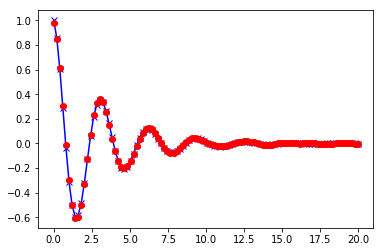

In [52]:
plt.plot(t, x, '-bx')
plt.plot(t, yr, 'ro')

In [53]:
window = np.zeros(N)
window[:15] = 1
yr2 = idct(y*window, norm='ortho')
sum(abs(x-yr2)**2) / sum(abs(x)**2)

0.07188180650076799

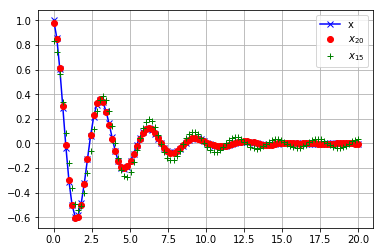

In [54]:
plt.plot(t, x, '-bx')
plt.plot(t, yr, 'ro')
plt.plot(t, yr2, 'g+')
plt.legend(['x', '$x_{20}$', '$x_{15}$'])
plt.grid()
plt.show()

In [55]:
from scipy.fftpack import dst, idst
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
 # scaling factor 2*N = 10
idst(dst(x, type=2), type=2)

array([ 10.,  20.,  10., -10.,  15.])

In [56]:
 # no scaling factor
idst(dst(x, type=2, norm='ortho'), type=2, norm='ortho')

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [57]:
 # scaling factor 2*N = 10
idst(dst(x, type=3), type=3)

array([ 10.,  20.,  10., -10.,  15.])

In [58]:
 # no scaling factor
idst(dst(x, type=3, norm='ortho'), type=3, norm='ortho')

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [59]:
 # scaling factor 2*(N+1) = 8
idst(dst(x, type=1), type=1)

array([ 12.,  24.,  12., -12.,  18.])